# Preparing data for a recurrent neural network

A recurrent neural network requires a 3D array as input. The first dimension is the number of samples, the second dimension is the number of time steps, and the third dimension is the number of features. The following code creates a 3D array with 3 samples, 2 time steps, and 1 feature.

Let's say we want to predict the next day after sequence of 3 days.  

In [1]:
import pandas as pd
import numpy as np

## Sample dataset

Let's say we want to predict the next day after sequence of 3 days.  

Here is the data we will use:

In [2]:
df = pd.DataFrame(
    data={
        'Temp':[77,78,79,80,78,82,76,76,85,73], 
        'Humidity': [50,51,52,53,67,59,58,56,62,55], 
        'Pressure': [29.92,29.93,29.94,29.95, 29.96,29.97,29.98,29.99,30.00,30.01]
    }, 
    index=['2023-04-01','2023-04-02','2023-04-03','2023-04-04', '2023-04-05','2023-04-06','2023-04-07','2023-04-08','2023-04-09','2023-04-10'])
df

,Temp,Humidity,Pressure
2023-04-01,77,50,29.92
2023-04-02,78,51,29.93
2023-04-03,79,52,29.94
2023-04-04,80,53,29.95
2023-04-05,78,67,29.96
2023-04-06,82,59,29.97
2023-04-07,76,58,29.98
2023-04-08,76,56,29.99
2023-04-09,85,62,30.00
2023-04-10,73,55,30.01


Considering the parameters of this problem we find that our first sample (observation) will be the feature values for the first 3 rows of the dataframe, and the second sample (observation) will be the next three rows starting at the second row, etc.

Let's begin by converting the dataframe to a numpy array.

In [3]:
arr2D = df.to_numpy() # convert the dataframe to a numpy array
arr2D

array([[77.  , 50.  , 29.92],
       [78.  , 51.  , 29.93],
       [79.  , 52.  , 29.94],
       [80.  , 53.  , 29.95],
       [78.  , 67.  , 29.96],
       [82.  , 59.  , 29.97],
       [76.  , 58.  , 29.98],
       [76.  , 56.  , 29.99],
       [85.  , 62.  , 30.  ],
       [73.  , 55.  , 30.01]])

The 2D data above is not not our input to the recurrent network - we have three feaures, but no observations. Observations will be the sequences length number of rows.

This might be easier to understand if we look at how we can manually create observations for our recurrent network training.

In [4]:
arr2D[0:3,:]  # this would be the first observation

array([[77.  , 50.  , 29.92],
       [78.  , 51.  , 29.93],
       [79.  , 52.  , 29.94]])

In [5]:
arr2D[1:4,:]  # this would be the second observation

array([[78.  , 51.  , 29.93],
       [79.  , 52.  , 29.94],
       [80.  , 53.  , 29.95]])

In [6]:
arr2D[2:5,:]  # this would be the third observation, etc

array([[79.  , 52.  , 29.94],
       [80.  , 53.  , 29.95],
       [78.  , 67.  , 29.96]])

But, this would be better to put into a function as follows:

In [7]:
def create_sequences(data, seq_length):
    obs = []
    print(obs)    
    for i in range(len(data)-seq_length-1):
        obs.append(data[i:(i+seq_length)+1])
    return np.array(obs)

In [8]:
RNN_input = create_sequences(arr2D, 3)
RNN_input

[]


array([[[77.  , 50.  , 29.92],
        [78.  , 51.  , 29.93],
        [79.  , 52.  , 29.94],
        [80.  , 53.  , 29.95]],

       [[78.  , 51.  , 29.93],
        [79.  , 52.  , 29.94],
        [80.  , 53.  , 29.95],
        [78.  , 67.  , 29.96]],

       [[79.  , 52.  , 29.94],
        [80.  , 53.  , 29.95],
        [78.  , 67.  , 29.96],
        [82.  , 59.  , 29.97]],

       [[80.  , 53.  , 29.95],
        [78.  , 67.  , 29.96],
        [82.  , 59.  , 29.97],
        [76.  , 58.  , 29.98]],

       [[78.  , 67.  , 29.96],
        [82.  , 59.  , 29.97],
        [76.  , 58.  , 29.98],
        [76.  , 56.  , 29.99]],

       [[82.  , 59.  , 29.97],
        [76.  , 58.  , 29.98],
        [76.  , 56.  , 29.99],
        [85.  , 62.  , 30.  ]]])

Review the data we have created above.  We have 6 'observations', each with 3 time steps and 3 features (Temp, Humidity and Pressure).  The last row of each observation is the target value we want to predict. We only need the temp value from the last row of each observation (the other values are not needed - because if you're trying to predict tomorrow's weather, you don't have any measures from tomorrow, because it's the future :) ).

Let's now extract our target variable. In this case, we want to predict the next day's temperature, so we will extract the last temperature value from each sequence (observation).

In [9]:
y = RNN_input[:,-1,0] # the 3 is the index of the column, and the 0 is the index of the row
y

array([80., 78., 82., 76., 76., 85.])

In [10]:
X = RNN_input[:,0:3,0:3] # the 3 is the index of the column, and the 0 is the index of the row
X

array([[[77.  , 50.  , 29.92],
        [78.  , 51.  , 29.93],
        [79.  , 52.  , 29.94]],

       [[78.  , 51.  , 29.93],
        [79.  , 52.  , 29.94],
        [80.  , 53.  , 29.95]],

       [[79.  , 52.  , 29.94],
        [80.  , 53.  , 29.95],
        [78.  , 67.  , 29.96]],

       [[80.  , 53.  , 29.95],
        [78.  , 67.  , 29.96],
        [82.  , 59.  , 29.97]],

       [[78.  , 67.  , 29.96],
        [82.  , 59.  , 29.97],
        [76.  , 58.  , 29.98]],

       [[82.  , 59.  , 29.97],
        [76.  , 58.  , 29.98],
        [76.  , 56.  , 29.99]]])

## Fit the data to a Recurrent neural network

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_train = y_train.reshape(-1,1)
y_train

array([[85.],
       [82.],
       [76.],
       [76.]])

In [13]:
y_test = y_test.reshape(-1,1)
y_test


array([[80.],
       [78.]])

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4, 3, 3)
(2, 3, 3)
(4, 1)
(2, 1)


Now, we need to split out data into train and test and normalize the data.

In [15]:
X_test.reshape(-1, 9)

array([[77.  , 50.  , 29.92, 78.  , 51.  , 29.93, 79.  , 52.  , 29.94],
       [78.  , 51.  , 29.93, 79.  , 52.  , 29.94, 80.  , 53.  , 29.95]])

In [16]:
X_train.shape

(4, 3, 3)

In [17]:
X_train


array([[[82.  , 59.  , 29.97],
        [76.  , 58.  , 29.98],
        [76.  , 56.  , 29.99]],

       [[79.  , 52.  , 29.94],
        [80.  , 53.  , 29.95],
        [78.  , 67.  , 29.96]],

       [[78.  , 67.  , 29.96],
        [82.  , 59.  , 29.97],
        [76.  , 58.  , 29.98]],

       [[80.  , 53.  , 29.95],
        [78.  , 67.  , 29.96],
        [82.  , 59.  , 29.97]]])

In [18]:
X_train.reshape(-1, 3)

array([[82.  , 59.  , 29.97],
       [76.  , 58.  , 29.98],
       [76.  , 56.  , 29.99],
       [79.  , 52.  , 29.94],
       [80.  , 53.  , 29.95],
       [78.  , 67.  , 29.96],
       [78.  , 67.  , 29.96],
       [82.  , 59.  , 29.97],
       [76.  , 58.  , 29.98],
       [80.  , 53.  , 29.95],
       [78.  , 67.  , 29.96],
       [82.  , 59.  , 29.97]])

In [19]:
X_train.reshape(-1, 3, 3)

array([[[82.  , 59.  , 29.97],
        [76.  , 58.  , 29.98],
        [76.  , 56.  , 29.99]],

       [[79.  , 52.  , 29.94],
        [80.  , 53.  , 29.95],
        [78.  , 67.  , 29.96]],

       [[78.  , 67.  , 29.96],
        [82.  , 59.  , 29.97],
        [76.  , 58.  , 29.98]],

       [[80.  , 53.  , 29.95],
        [78.  , 67.  , 29.96],
        [82.  , 59.  , 29.97]]])

In [1]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = X_scaler.fit_transform(X_train.reshape(-1, 3))
X_test_scaled = X_scaler.transform(X_train.reshape(-1, 3))


y_scaler = MinMaxScaler(feature_range=(0, 1)) # I don't necessarily need to rescale the y values, but I may test doing this in the future
y_scaler.fit(y_train.reshape(-1, 1))

NameError: name 'X_train' is not defined

In [21]:
X_train_scaled

array([[1.        , 0.46666667, 0.6       ],
       [0.        , 0.4       , 0.8       ],
       [0.        , 0.26666667, 1.        ],
       [0.5       , 0.        , 0.        ],
       [0.66666667, 0.06666667, 0.2       ],
       [0.33333333, 1.        , 0.4       ],
       [0.33333333, 1.        , 0.4       ],
       [1.        , 0.46666667, 0.6       ],
       [0.        , 0.4       , 0.8       ],
       [0.66666667, 0.06666667, 0.2       ],
       [0.33333333, 1.        , 0.4       ],
       [1.        , 0.46666667, 0.6       ]])

In [22]:
X_train_scaled.reshape(-1, 3, 3)

array([[[1.        , 0.46666667, 0.6       ],
        [0.        , 0.4       , 0.8       ],
        [0.        , 0.26666667, 1.        ]],

       [[0.5       , 0.        , 0.        ],
        [0.66666667, 0.06666667, 0.2       ],
        [0.33333333, 1.        , 0.4       ]],

       [[0.33333333, 1.        , 0.4       ],
        [1.        , 0.46666667, 0.6       ],
        [0.        , 0.4       , 0.8       ]],

       [[0.66666667, 0.06666667, 0.2       ],
        [0.33333333, 1.        , 0.4       ],
        [1.        , 0.46666667, 0.6       ]]])

In [23]:
X_train_scaled

array([[1.        , 0.46666667, 0.6       ],
       [0.        , 0.4       , 0.8       ],
       [0.        , 0.26666667, 1.        ],
       [0.5       , 0.        , 0.        ],
       [0.66666667, 0.06666667, 0.2       ],
       [0.33333333, 1.        , 0.4       ],
       [0.33333333, 1.        , 0.4       ],
       [1.        , 0.46666667, 0.6       ],
       [0.        , 0.4       , 0.8       ],
       [0.66666667, 0.06666667, 0.2       ],
       [0.33333333, 1.        , 0.4       ],
       [1.        , 0.46666667, 0.6       ]])

We are now ready to fit the data to a recurrent neural network.  We will use a simple RNN with 20 neurons in the hidden layer.  We will use the mean squared error loss function and the adam optimizer. Our input consists of 6 observations, each with 3 time steps and 3 features.  Our target is the temperature value for the last time step of each observation.

In [24]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(20, input_shape=(3,3)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                480       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=1)

Epoch 1/500


2023-04-28 15:34:48.152217: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 0s 2ms/step - loss: 6276.8306
Epoch 2/500
4/4 [==============================] - 0s 1ms/step - loss: 6263.4746
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 6250.1514
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 6236.8901
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 6223.5698
Epoch 6/500
4/4 [==============================] - 0s 1ms/step - loss: 6210.4600
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 6197.4043
Epoch 8/500
4/4 [==============================] - 0s 954us/step - loss: 6183.9009
Epoch 9/500
4/4 [==============================] - 0s 938us/step - loss: 6170.7949
Epoch 10/500
4/4 [==============================] - 0s 888us/step - loss: 6156.7144
Epoch 11/500
4/4 [==============================] - 0s 927us/step - loss: 6140.5825
Epoch 12/500
4/4 [==============================] - 0s 937us/step - loss: 6118.5698
Epoch 13/500
4/4 [=========

Let's now investigate the predictions of our model.

In [27]:
y_test

array([[80.],
       [78.]])

In [28]:
y_pred = model.predict(X_test)

y_pred

1/1 [==============================] - 0s 72ms/step


array([[39.089912],
       [39.08992 ]], dtype=float32)

In [29]:
y_pred

array([[39.089912],
       [39.08992 ]], dtype=float32)

In [30]:
results = pd.DataFrame()

results['actual'] = y_test.flatten()
results['predicted'] = y_pred.flatten()
results['residual'] = results['actual'] - results['predicted']

results

,actual,predicted,residual
0,80.0,39.089912,40.910088
1,78.0,39.089920,38.910080


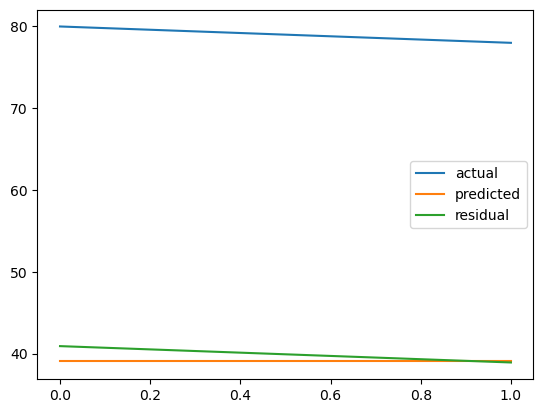

In [31]:
from matplotlib import pyplot as plt

plt.plot(results['actual'], label = 'actual')
plt.plot(results['predicted'], label = 'predicted')
plt.plot(results['residual'], label = 'residual')

plt.legend()

plt.show()

Now the above graph isn't very interesting, as the dataset was very small (for illustration purposes). This smaller dataset makes it easier to see the structure of the data (since we can see every observation). For larger datasets, the approach is the same - only there will be more observations, possible different length timesteps, and different features.